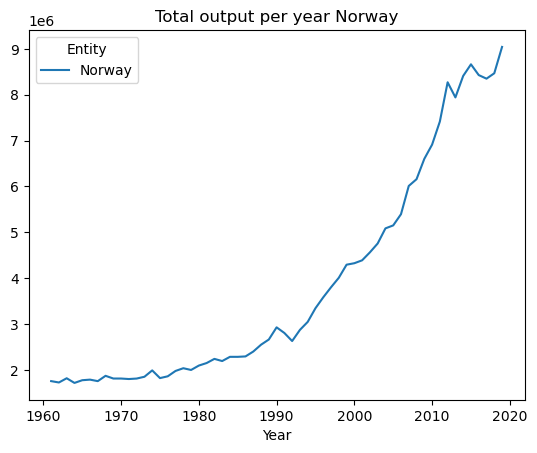

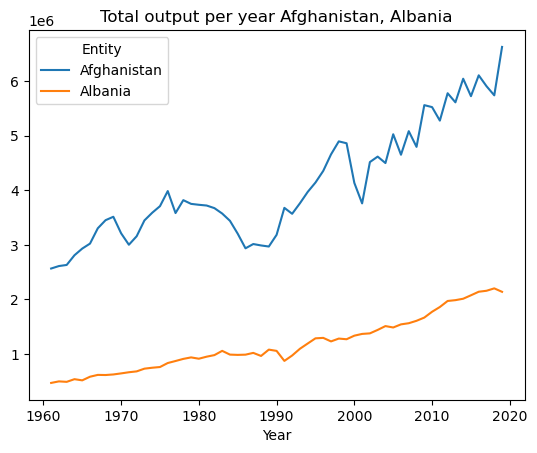

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

data = pd.read_csv('../downloads/Data.csv')
geodata = geopandas.read_file('../downloads/Geodata.shp')

def countries_list() -> list:
        """
        Method that outputs a list of countries available in the data.
        
        @params
        None

        @Returns
        countries: List of unique countries in the data
        """
        
        try:
            countries = list(dict.fromkeys(data['Entity']))
        
        except: 
            countries = print('Failed to convert to list')
            
        return countries

def method_five(*country: str) -> None:
        """
        This method compars the total of the "_output_" columns for each of the chosen countries and plot it.
        Only input one of the parameters, single string will be transformed to list.

        @Params
        country: String with country name or countries separated by commas

        @Returns
        None
        """

        # Ensure a value is given
        if not country:
            raise TypeError("Please input one country or more")

        # Get list of all countries
        all_countries = countries_list()

        # Check given parameters are in data
        for value in country:
            if value not in all_countries:
                raise TypeError(f"Country {value} not found in data")

        # Set columns to keep in data for summary
        target_columns = ['Entity','Year','crop_output_quantity','animal_output_quantity','fish_output_quantity']

        # Fetch relevant data based on countries
        relevant_data = data[data['Entity'].isin(country)][target_columns]
        
        # Find total output based on relevant columns
        relevant_data['total_output'] = relevant_data[['crop_output_quantity','animal_output_quantity','fish_output_quantity']]\
            .sum(axis=1)

        # Create pivot table to easily plot data
        result = relevant_data[['Year','Entity','total_output']]\
            .pivot_table(index='Year', columns='Entity', values= 'total_output')\
            .reset_index()

        # Get all countries in string
        title_header = ', '.join(country)
        # Plot data
        result.plot.line(x = 'Year', title = f'Total output per year {title_header}')


method_five('Norway')

method_five('Afghanistan', 'Albania')

In [2]:
method_five('Failed')

TypeError: Country Failed not found in data

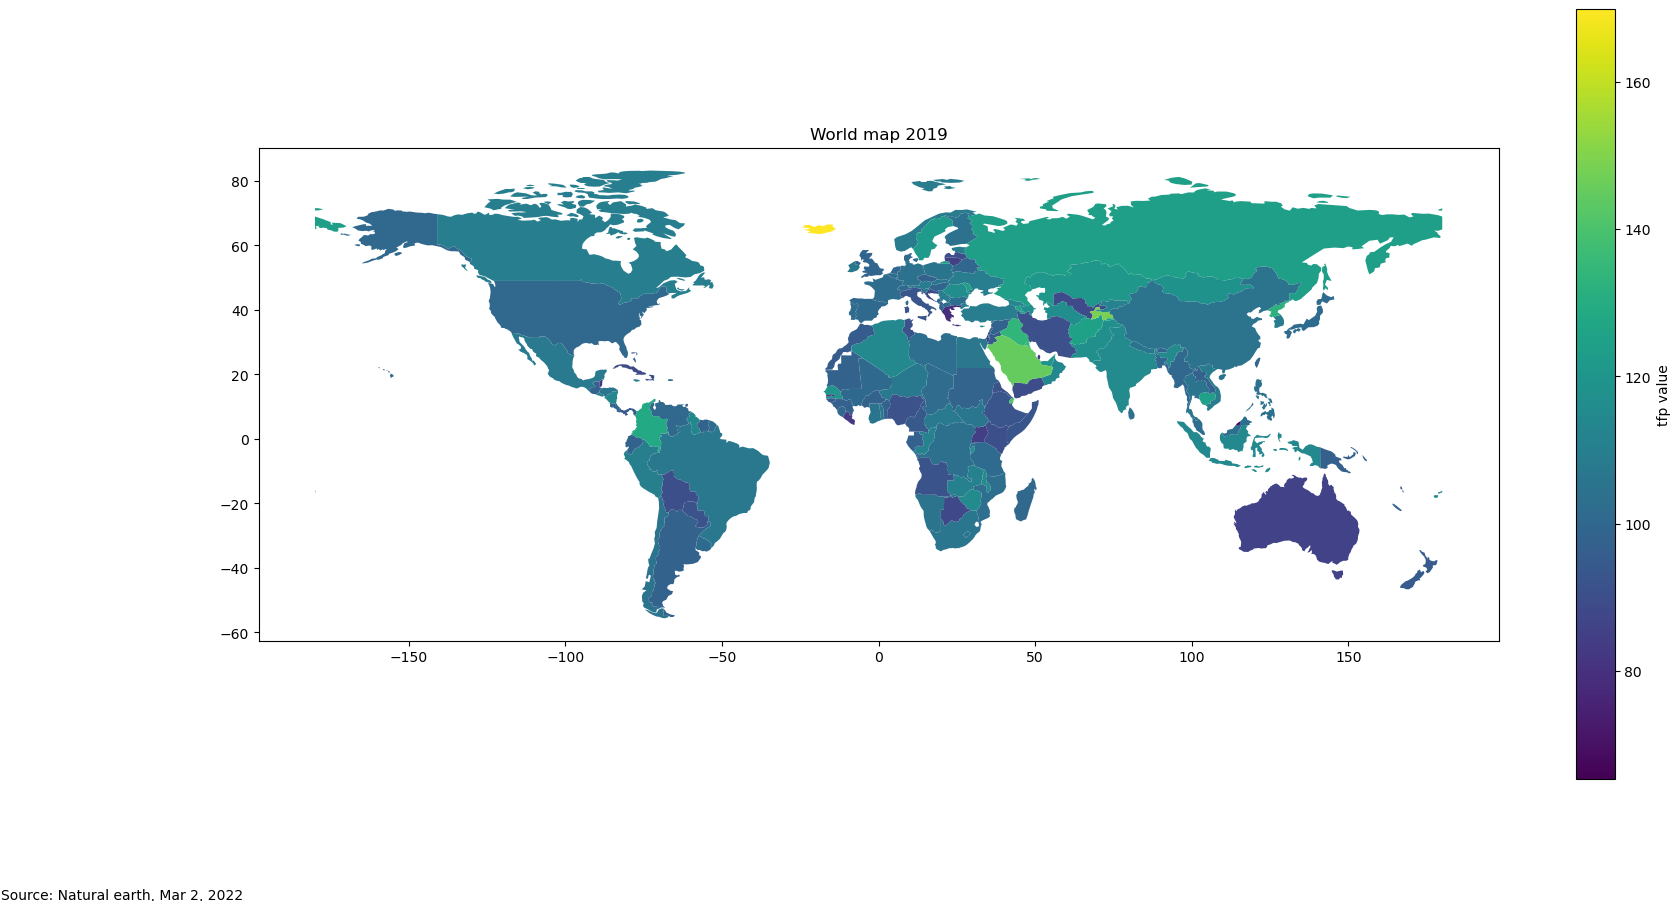

In [26]:
import numpy as np

def chloropleth(year: int) -> None:
        """
        Short desc

        @Param
        year: int

        @Returns
        """

        file = open('compare/Geodata_Countries.txt', 'w+')

        content = str(geodata.name.unique())

        file.write(content)
        file.close()
        
        file = open('compare/Agri_Countries.txt', 'w+')

        content = str(data['Entity'].unique())

        file.write(content)
        file.close()

        # Rename countries in agri data
        merge_dict = {
                'United States':'United States of America',
                'Democratic Republic of Congo':'Dem. Rep. Congo',
                'Central African Republic':'Central African Rep.',
                'South Sudan':'S. Sudan'
        }

        data_renamed = data.copy()
        data_renamed['Entity'].replace(merge_dict, inplace = True)

        all_data = geodata.rename(columns={'name':'Entity'}).merge(data_renamed, on='Entity')

        #Plot the Choropleth map
        all_data[all_data['Year'] == year].plot(column = 'tfp',
                      legend = True,
                      figsize = [20,10],\
                      legend_kwds = {'label': "tfp value"})
        # Title and annotations     
        plt.title(f'World map {year}')           
        plt.annotate(text='Source: Natural earth, Mar 2, 2022',
                    xy=(1,1),
                    xycoords='figure points',
                    )
        plt.show()

chloropleth(2019)